In [1]:
# Dados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessamento

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Rede neural
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

---

# Carregando dados

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

---

# Fazendo pré-processamento

In [7]:
# Juntando os dois dfs para ter acesso a todos os dados

df_juntado = df_train.append(df_test, ignore_index=True)

C:\Users\merces\AppData\Local\Temp\ipykernel_20064\2641926049.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_juntado = df_train.append(df_test, ignore_index=True)


In [8]:
df_juntado

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
df_juntado.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [10]:
# Criando o df final

df = pd.DataFrame()

In [11]:
def gera_graf(dado, coluna, contador=True):
    print(f'Valores unicos: {dado[coluna].nunique()}')
    print(f'Quais são os valores unicos: {dado[coluna].unique()}')
    print(f'Quantidade de valores nulls: {dado[coluna].isnull().sum()}')
    print(f'Qtde por opcao: \n{dado[coluna].value_counts()}')
    
    if contador:
        # Gráfico de contagem
        plt.figure(figsize=(8, 6))
        dado.groupby([coluna, 'Survived']).size().unstack().plot(kind='bar')
        plt.xlabel(f'Coluna: {coluna}')
        plt.ylabel('Quantidade de pessoas')
        plt.xticks(rotation=0)
        plt.title(coluna)
        plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
        plt.show()

---

### Survived

In [12]:
df["Survived"] = df_juntado["Survived"]

### Pclass

Valores unicos: 3
Quais são os valores unicos: [3 1 2]
Quantidade de valores nulls: 0
Qtde por opcao: 
3    709
1    323
2    277
Name: Pclass, dtype: int64


<Figure size 800x600 with 0 Axes>

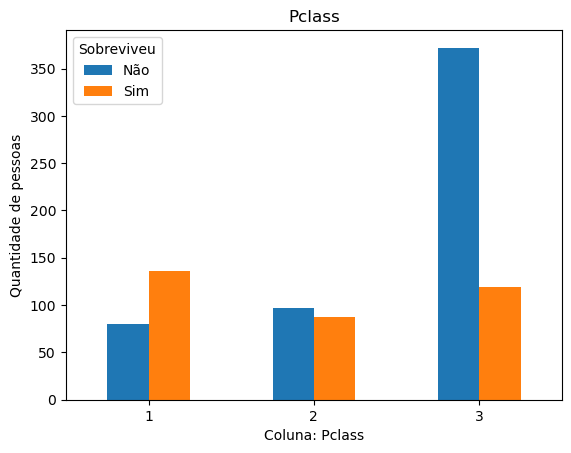

In [13]:
gera_graf(df_juntado, "Pclass")

In [14]:
df["Pclass"] = df_juntado["Pclass"]

### Name

Valores unicos: 1307
Quais são os valores unicos: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' ... 'Saether, Mr. Simon Sivertsen'
 'Ware, Mr. Frederick' 'Peter, Master. Michael J']
Quantidade de valores nulls: 0
Qtde por opcao: 
Connolly, Miss. Kate                                   2
Kelly, Mr. James                                       2
Braund, Mr. Owen Harris                                1
Johnson, Master. Harold Theodor                        1
Gustafsson, Mr. Alfred Ossian                          1
                                                      ..
Carter, Miss. Lucile Polk                              1
Silvey, Mr. William Baird                              1
Kallio, Mr. Nikolai Erland                             1
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)    1
Peter, Master. Michael J                               1
Name: Name, Length: 1307, dtype: int64


<Figure size 800x600 with 0 Axes>

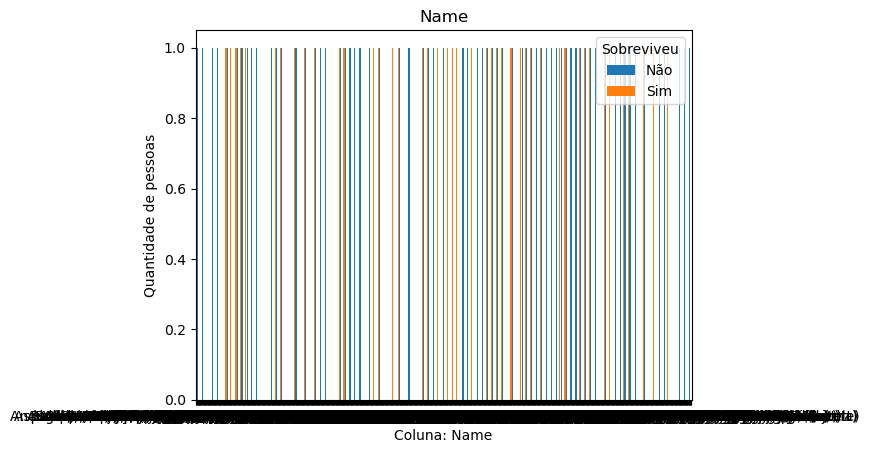

In [15]:
gera_graf(df_juntado,"Name")

### Sex

Valores unicos: 2
Quais são os valores unicos: ['male' 'female']
Quantidade de valores nulls: 0
Qtde por opcao: 
male      843
female    466
Name: Sex, dtype: int64


<Figure size 800x600 with 0 Axes>

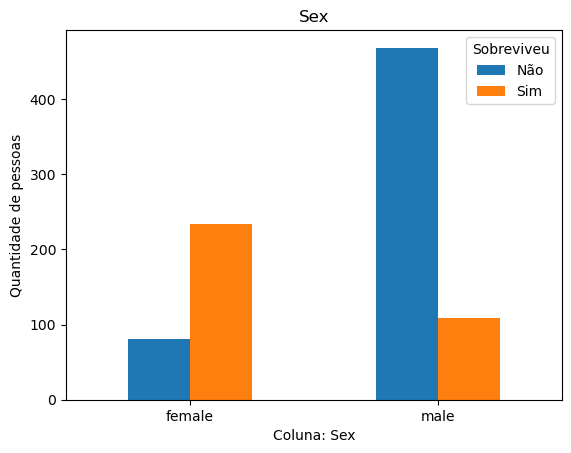

In [16]:
gera_graf(df_juntado,'Sex')

In [17]:
df["Sex"] = df_juntado["Sex"]

In [18]:
df

,Survived,Pclass,Sex
0,0.0,3,male
1,1.0,1,female
2,1.0,3,female
3,1.0,1,female
4,0.0,3,male
...,...,...,...
1304,NaN,3,male
1305,NaN,1,female
1306,NaN,3,male
1307,NaN,3,male


### Age

Valores unicos: 98
Quais são os valores unicos: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]
Quantidade de valores nulls: 263
Qtde por opcao: 
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: Age, Length: 98, dtype: int64


<Figure size 800x600 with 0 Axes>

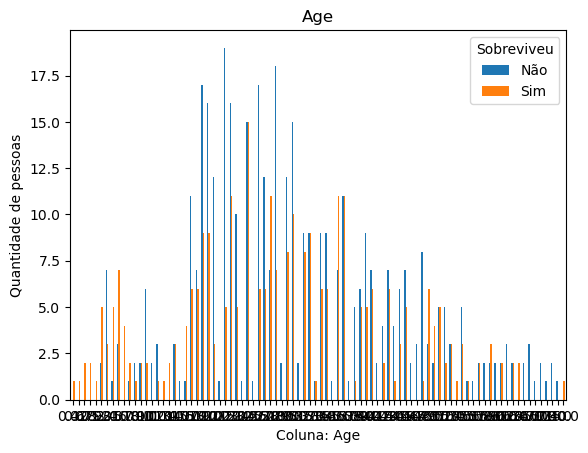

In [19]:
gera_graf(df_juntado,"Age")

In [20]:
df["Age"] = df_juntado["Age"]

### SibSp

Valores unicos: 7
Quais são os valores unicos: [1 0 3 4 2 5 8]
Quantidade de valores nulls: 0
Qtde por opcao: 
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64


<Figure size 800x600 with 0 Axes>

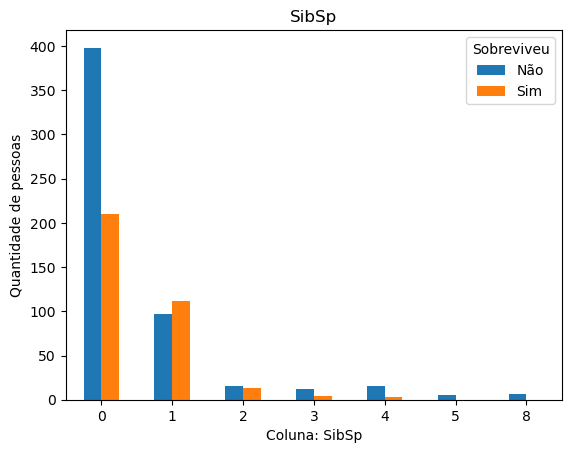

In [21]:
gera_graf(df_juntado, "SibSp")

In [22]:
df["SibSp"] = df_juntado["SibSp"]

### Parch

Valores unicos: 8
Quais são os valores unicos: [0 1 2 5 3 4 6 9]
Quantidade de valores nulls: 0
Qtde por opcao: 
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64


<Figure size 800x600 with 0 Axes>

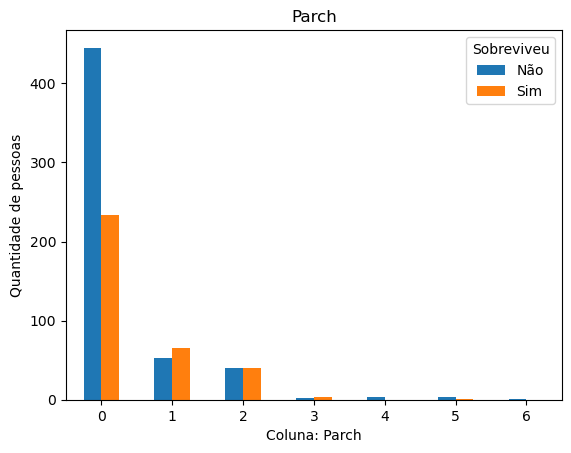

In [23]:
gera_graf(df_juntado, "Parch")

In [24]:
df["Parch"] = df_juntado["Parch"]

### Ticket

Valores unicos: 929
Quais são os valores unicos: ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 1775

<Figure size 800x600 with 0 Axes>

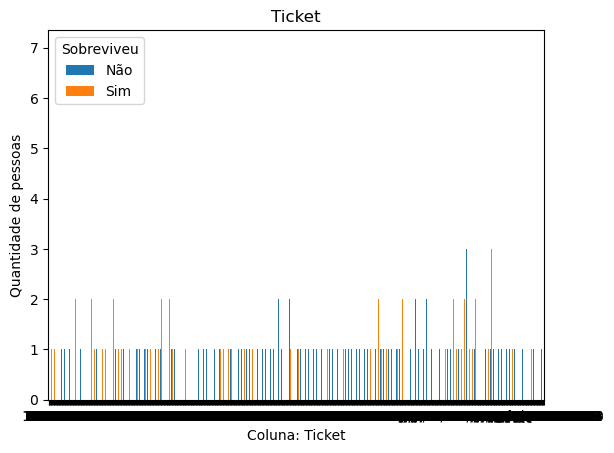

In [25]:
gera_graf(df_juntado, "Ticket")

### Fare

Valores unicos: 281
Quais são os valores unicos: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      15.05    39.    

<Figure size 800x600 with 0 Axes>

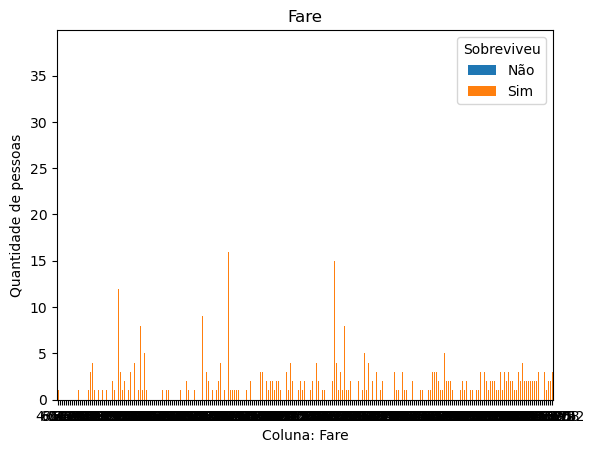

In [26]:
gera_graf(df_juntado, "Fare")

In [27]:
df["Fare"] = df_juntado["Fare"]

### Cabin

Valores unicos: 186
Quais são os valores unicos: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C

<Figure size 800x600 with 0 Axes>

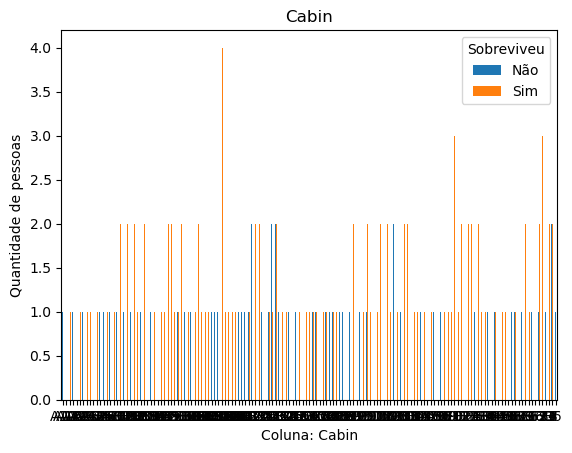

In [28]:
gera_graf(df_juntado, "Cabin")

### Embarked

Valores unicos: 3
Quais são os valores unicos: ['S' 'C' 'Q' nan]
Quantidade de valores nulls: 2
Qtde por opcao: 
S    914
C    270
Q    123
Name: Embarked, dtype: int64


<Figure size 800x600 with 0 Axes>

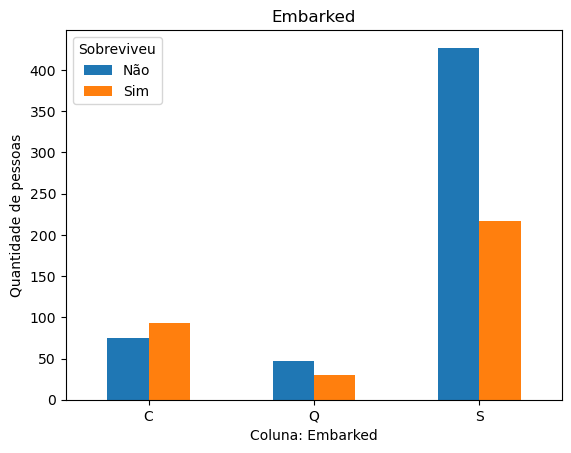

In [29]:
gera_graf(df_juntado, "Embarked")

In [30]:
df["Embarked"] = df_juntado["Embarked"]

In [31]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,NaN,3,male,NaN,0,0,8.0500,S
1305,NaN,1,female,39.0,0,0,108.9000,C
1306,NaN,3,male,38.5,0,0,7.2500,S
1307,NaN,3,male,NaN,0,0,8.0500,S


---

## Fazendo pré-processamento nas colunas

In [32]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##### Preenchendo os nulls de Age

In [33]:
df["Age"].mean()

29.881137667304014

In [34]:
df["Age"] = df["Age"].fillna(29)

##### Mapeando o sexo para 1 e 0

In [35]:
df["Sex"] = df['Sex'].map({'male': 1, 'female': 0})

##### Fazendo dummies do portao de embarque e da classe

In [36]:
embarked = pd.get_dummies(df['Embarked'], prefix = 'Embarked', drop_first = True)
pclass = pd.get_dummies(df['Pclass'], prefix = "Pclass", drop_first = True)

In [37]:
df = pd.concat([df, pclass, embarked], axis = 1)
df.drop(['Pclass', 'Embarked'], axis=1, inplace=True)

In [38]:
df

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0.0,1,22.0,1,0,7.2500,0,1,0,1
1,1.0,0,38.0,1,0,71.2833,0,0,0,0
2,1.0,0,26.0,0,0,7.9250,0,1,0,1
3,1.0,0,35.0,1,0,53.1000,0,0,0,1
4,0.0,1,35.0,0,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,1,29.0,0,0,8.0500,0,1,0,1
1305,NaN,0,39.0,0,0,108.9000,0,0,0,0
1306,NaN,1,38.5,0,0,7.2500,0,1,0,1
1307,NaN,1,29.0,0,0,8.0500,0,1,0,1


##### Separando o df juntado em um de treino e um de teste

---

# Redes Neurais

In [39]:
train = df[:891]
test = df[891:]

In [40]:
train['Survived'].isnull().sum()

0

In [41]:
train

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0.0,1,22.0,1,0,7.2500,0,1,0,1
1,1.0,0,38.0,1,0,71.2833,0,0,0,0
2,1.0,0,26.0,0,0,7.9250,0,1,0,1
3,1.0,0,35.0,1,0,53.1000,0,0,0,1
4,0.0,1,35.0,0,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0.0,1,27.0,0,0,13.0000,1,0,0,1
887,1.0,0,19.0,0,0,30.0000,0,0,0,1
888,0.0,0,29.0,1,2,23.4500,0,1,0,1
889,1.0,1,26.0,0,0,30.0000,0,0,0,0


In [42]:
test['Survived'].isnull().sum()

418

In [43]:
test

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
891,NaN,1,34.5,0,0,7.8292,0,1,1,0
892,NaN,0,47.0,1,0,7.0000,0,1,0,1
893,NaN,1,62.0,0,0,9.6875,1,0,1,0
894,NaN,1,27.0,0,0,8.6625,0,1,0,1
895,NaN,0,22.0,1,1,12.2875,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,1,29.0,0,0,8.0500,0,1,0,1
1305,NaN,0,39.0,0,0,108.9000,0,0,0,0
1306,NaN,1,38.5,0,0,7.2500,0,1,0,1
1307,NaN,1,29.0,0,0,8.0500,0,1,0,1


In [44]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [45]:
X

,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,22.0,1,0,7.2500,0,1,0,1
1,0,38.0,1,0,71.2833,0,0,0,0
2,0,26.0,0,0,7.9250,0,1,0,1
3,0,35.0,1,0,53.1000,0,0,0,1
4,1,35.0,0,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,1,27.0,0,0,13.0000,1,0,0,1
887,0,19.0,0,0,30.0000,0,0,0,1
888,0,29.0,1,2,23.4500,0,1,0,1
889,1,26.0,0,0,30.0000,0,0,0,0


In [46]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [47]:
X_test = test.drop('Survived', axis = 1)

In [48]:
X_test

,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
891,1,34.5,0,0,7.8292,0,1,1,0
892,0,47.0,1,0,7.0000,0,1,0,1
893,1,62.0,0,0,9.6875,1,0,1,0
894,1,27.0,0,0,8.6625,0,1,0,1
895,0,22.0,1,1,12.2875,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1304,1,29.0,0,0,8.0500,0,1,0,1
1305,0,39.0,0,0,108.9000,0,0,0,0
1306,1,38.5,0,0,7.2500,0,1,0,1
1307,1,29.0,0,0,8.0500,0,1,0,1


In [49]:
def func_acuracia(algoritmo, X_train, y_train, vc):
    modelo = algoritmo.fit(X_train, y_train)
    acuracia = modelo.score(X_train, y_train)
    
    train_pred = model_selection.cross_val_predict(algoritmo, X_train, y_train, cv=vc, n_jobs=-1)    
    acuracia_vc = metrics.accuracy_score(y_train, train_pred) 
    
    # Calcular as outras métricas desejadas
    cm = metrics.confusion_matrix(y_train, train_pred)
    fpr, tpr, _ = metrics.roc_curve(y_train, train_pred)
    roc_auc = metrics.auc(fpr, tpr)
    recall = metrics.recall_score(y_train, train_pred)
    f1_score = metrics.f1_score(y_train, train_pred)
    
    return {
        "Acuracia": acuracia,
        "Matriz de Confusao": cm,
        "Curva ROC": (fpr, tpr, roc_auc),
        "Recall": recall,
        "F1-Score": f1_score
    }


In [50]:
def plot_metricas(resultado):
    # Plot da Matriz de Confusão
    plt.figure(figsize=(8, 6))
    sns.heatmap(resultado['Matriz de Confusao'], annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Valores Preditos')
    plt.ylabel('Valores Verdadeiros')
    plt.title('Matriz de Confusão')
    plt.show()

    # Plot da Curva ROC
    fpr, tpr, roc_auc = resultado['Curva ROC']
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    # Plot de Recall e F1-Score
    recall = resultado['Recall']
    f1_score = resultado['F1-Score']
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.bar(['Classe'], [recall])
    plt.ylabel('Recall')
    plt.title('Recall')

    plt.subplot(1, 2, 2)
    plt.bar(['Classe'], [f1_score])
    plt.ylabel('F1-Score')
    plt.title('F1-Score')

    plt.tight_layout()
    plt.show()


---

# Avaliando resultados

### RandomForest

In [51]:
resultado = func_acuracia(RandomForestClassifier(), X, y, 10)

print(f"Acurácia: {resultado['Acuracia']*100}")
print(f"Matriz de Confusão: {resultado['Matriz de Confusao']*100}")
print(f"Curva ROC: {resultado['Curva ROC'][0]*100, resultado['Curva ROC'][1]*100, resultado['Curva ROC'][2]*100}")
print(f"Recall: {resultado['Recall']*100}")
print(f"Score: {resultado['F1-Score']*100}")

Acurácia: 97.64309764309765
Matriz de Confusão: [[46800  8100]
 [ 9800 24400]]
Curva ROC: (array([  0.        ,  14.75409836, 100.        ]), array([  0.        ,  71.34502924, 100.        ]), 78.29546543955517)
Recall: 71.34502923976608
Score: 73.16341829085457


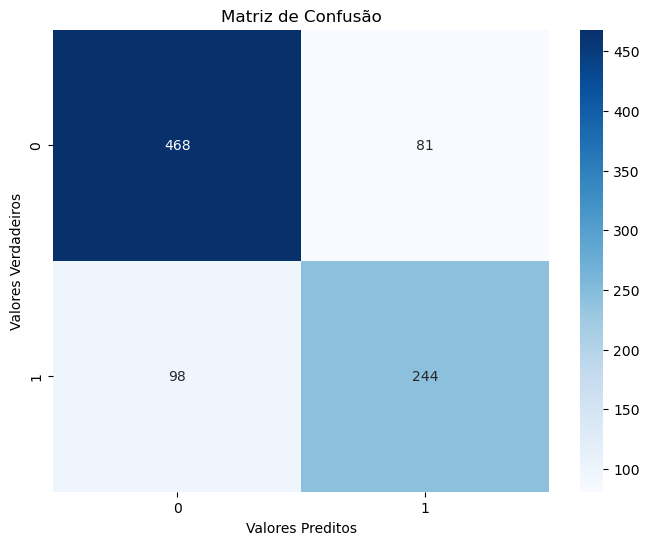

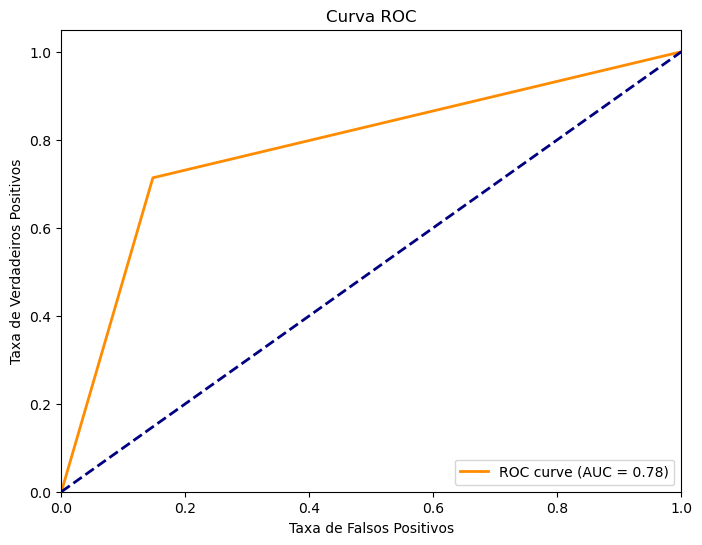

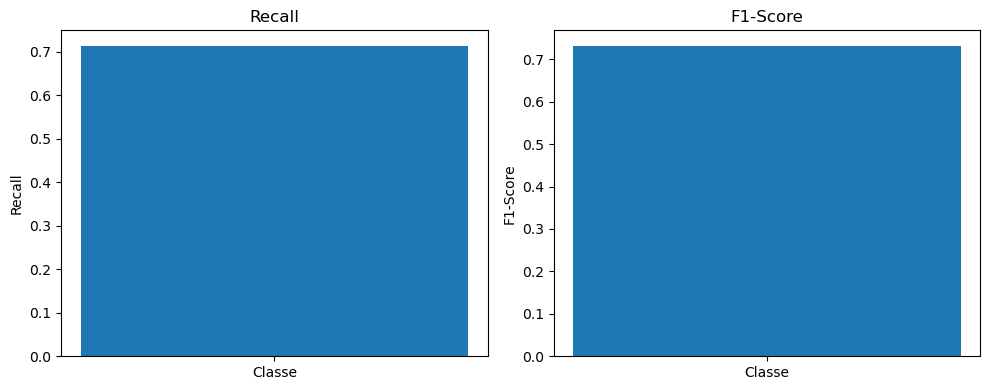

In [52]:
plot_metricas(resultado)

### Logistic regression

In [53]:
resultado = func_acuracia(LogisticRegression(max_iter=1000), X, y, 10)

print(f"Acurácia: {resultado['Acuracia']*100}")
print(f"Matriz de Confusão: {resultado['Matriz de Confusao']*100}")
print(f"Curva ROC: {resultado['Curva ROC'][0]*100, resultado['Curva ROC'][1]*100, resultado['Curva ROC'][2]*100}")
print(f"Recall: {resultado['Recall']*100}")
print(f"Score: {resultado['F1-Score']*100}")

Acurácia: 80.69584736251403
Matriz de Confusão: [[47700  7200]
 [10500 23700]]
Curva ROC: (array([  0.       ,  13.1147541, 100.       ]), array([  0.        ,  69.29824561, 100.        ]), 78.09174575783722)
Recall: 69.2982456140351
Score: 72.8110599078341


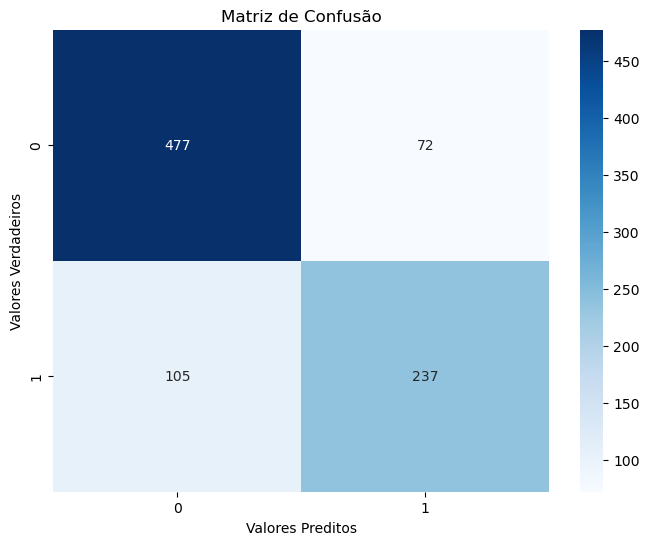

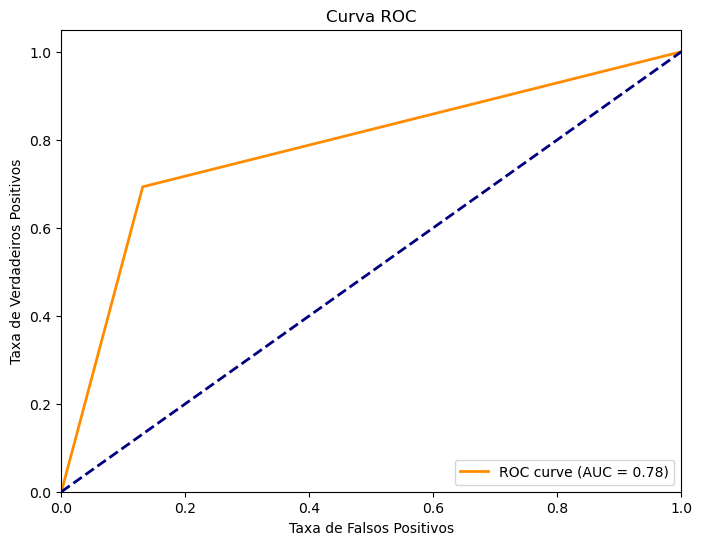

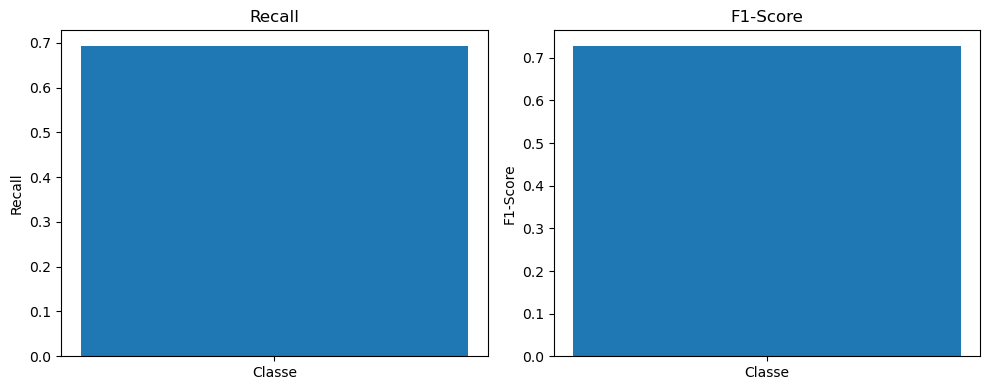

In [54]:
plot_metricas(resultado)

### K-Nearest Neighbours

In [55]:
resultado = func_acuracia(KNeighborsClassifier(), X, y, 10)

print(f"Acurácia: {resultado['Acuracia']*100}")
print(f"Matriz de Confusão: {resultado['Matriz de Confusao']*100}")
print(f"Curva ROC: {resultado['Curva ROC'][0]*100, resultado['Curva ROC'][1]*100, resultado['Curva ROC'][2]*100}")
print(f"Recall: {resultado['Recall']*100}")
print(f"Score: {resultado['F1-Score']*100}")

Acurácia: 81.25701459034792
Matriz de Confusão: [[43600 11300]
 [15900 18300]]
Curva ROC: (array([  0.        ,  20.58287796, 100.        ]), array([  0.        ,  53.50877193, 100.        ]), 66.46294698494873)
Recall: 53.50877192982456
Score: 57.36677115987462


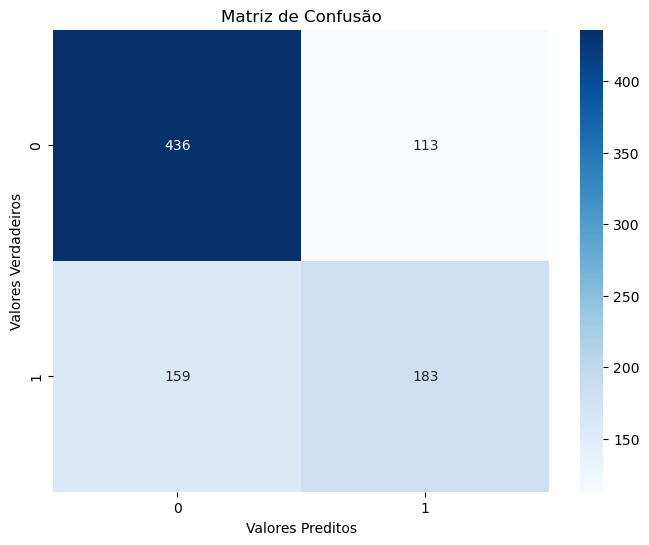

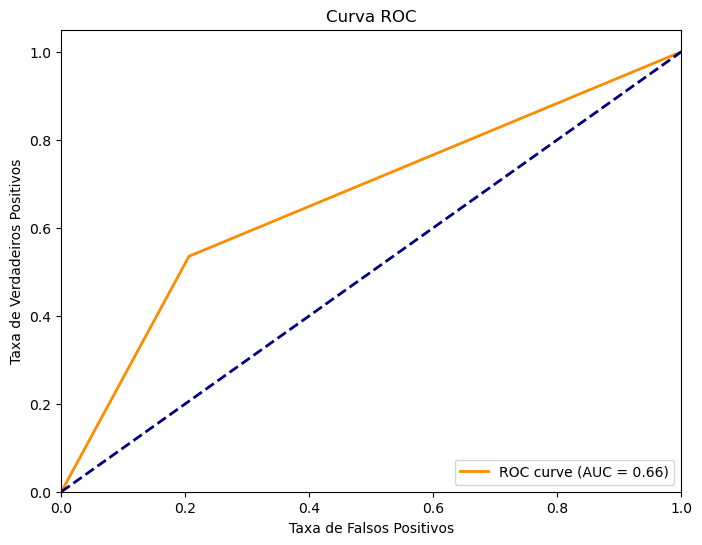

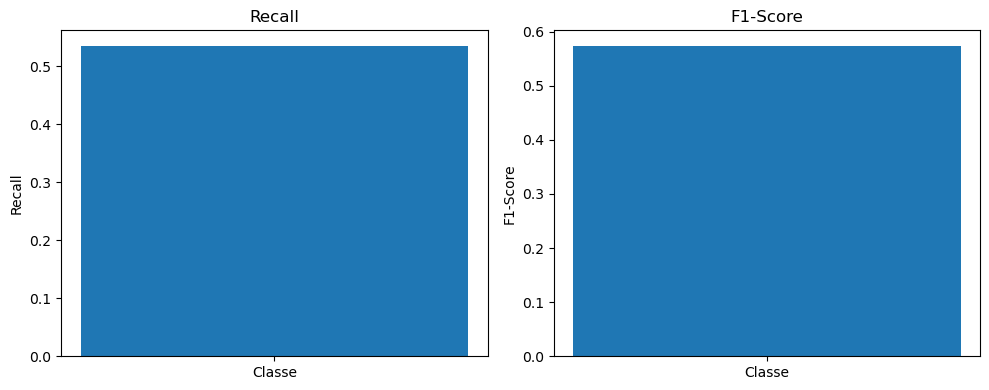

In [56]:
plot_metricas(resultado)

### Gaussian Naive Bayes

In [57]:
resultado = func_acuracia(GaussianNB(), X, y, 10)

print(f"Acurácia: {resultado['Acuracia']*100}")
print(f"Matriz de Confusão: {resultado['Matriz de Confusao']*100}")
print(f"Curva ROC: {resultado['Curva ROC'][0]*100, resultado['Curva ROC'][1]*100, resultado['Curva ROC'][2]*100}")
print(f"Recall: {resultado['Recall']*100}")
print(f"Score: {resultado['F1-Score']*100}")

Acurácia: 79.68574635241302
Matriz de Confusão: [[45700  9200]
 [ 9900 24300]]
Curva ROC: (array([  0.        ,  16.75774135, 100.        ]), array([  0.        ,  71.05263158, 100.        ]), 77.14744511552104)
Recall: 71.05263157894737
Score: 71.78729689807977


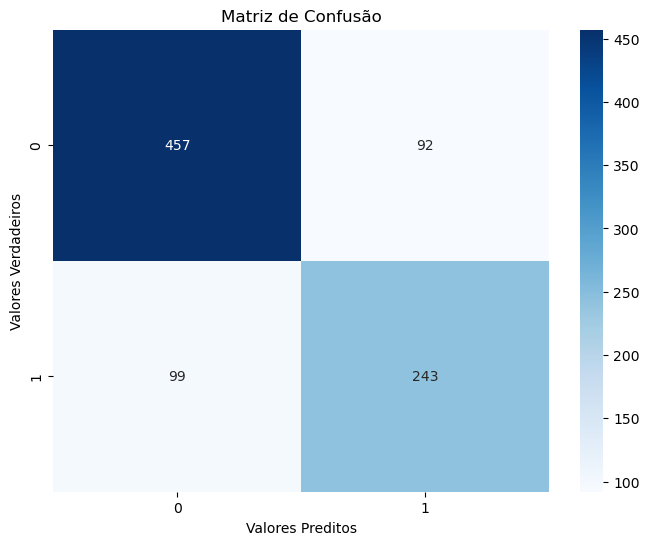

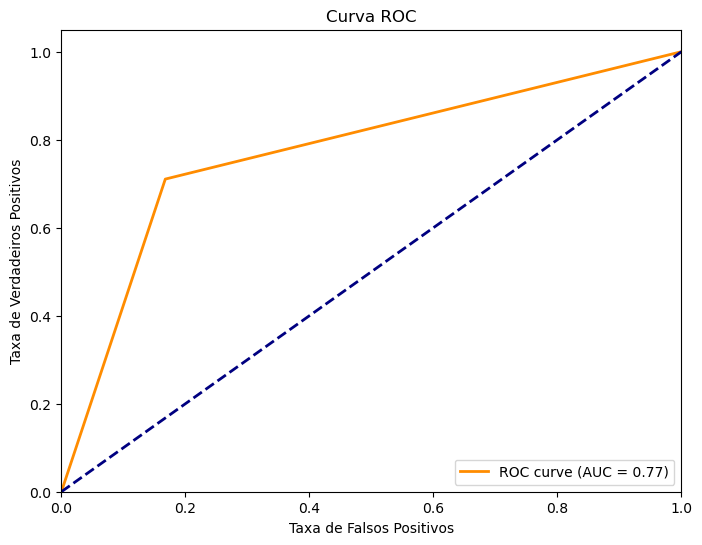

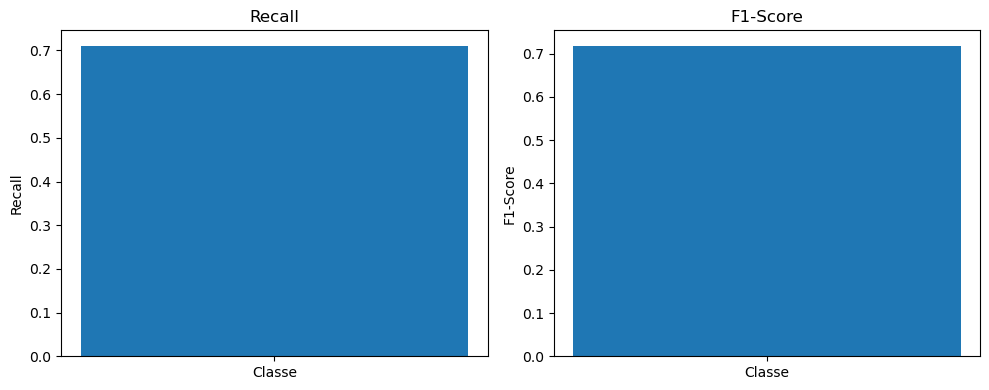

In [58]:
plot_metricas(resultado)

### Linear Support Vector Machines (SVC)

In [59]:
resultado = func_acuracia(GaussianNB(), X, y, 10)

print(f"Acurácia: {resultado['Acuracia']*100}")
print(f"Matriz de Confusão: {resultado['Matriz de Confusao']*100}")
print(f"Curva ROC: {resultado['Curva ROC'][0]*100, resultado['Curva ROC'][1]*100, resultado['Curva ROC'][2]*100}")
print(f"Recall: {resultado['Recall']*100}")
print(f"Score: {resultado['F1-Score']*100}")

Acurácia: 79.68574635241302
Matriz de Confusão: [[45700  9200]
 [ 9900 24300]]
Curva ROC: (array([  0.        ,  16.75774135, 100.        ]), array([  0.        ,  71.05263158, 100.        ]), 77.14744511552104)
Recall: 71.05263157894737
Score: 71.78729689807977


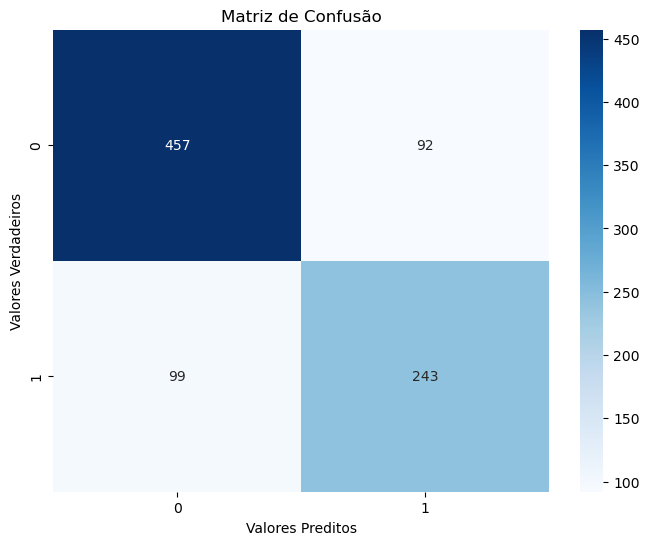

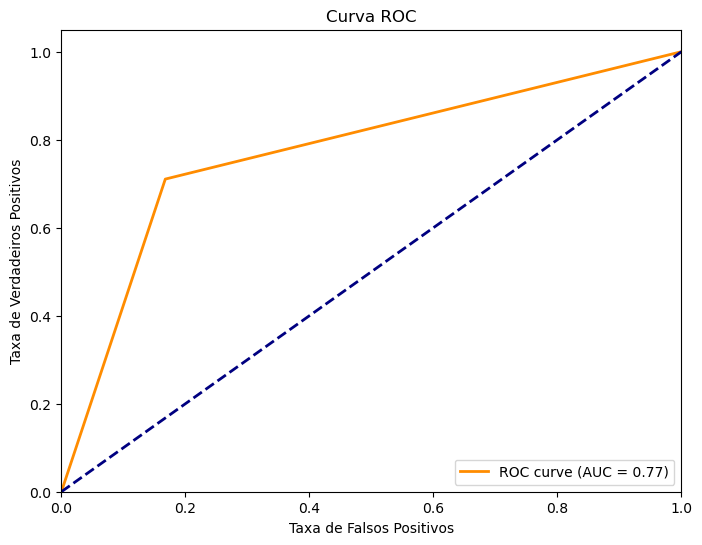

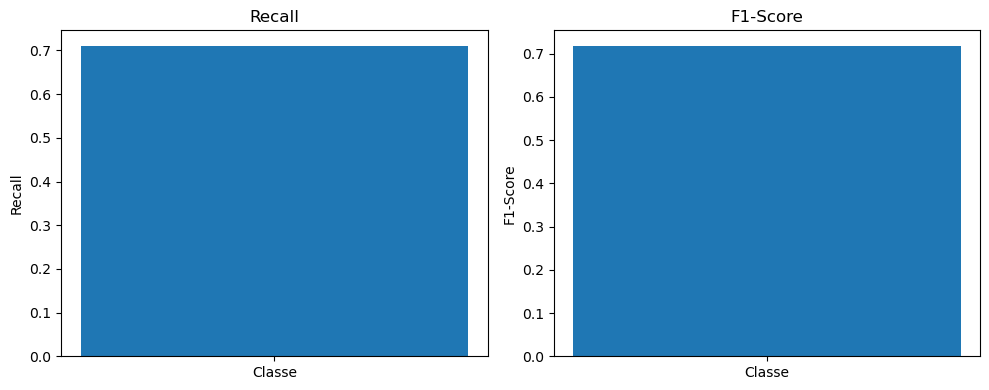

In [60]:
plot_metricas(resultado)

### Stochastic Gradient Descent

In [61]:
resultado = func_acuracia(SGDClassifier(), X, y, 10)

print(f"Acurácia: {resultado['Acuracia']*100}")
print(f"Matriz de Confusão: {resultado['Matriz de Confusao']*100}")
print(f"Curva ROC: {resultado['Curva ROC'][0]*100, resultado['Curva ROC'][1]*100, resultado['Curva ROC'][2]*100}")
print(f"Recall: {resultado['Recall']*100}")
print(f"Score: {resultado['F1-Score']*100}")

Acurácia: 76.43097643097643
Matriz de Confusão: [[47100  7800]
 [19900 14300]]
Curva ROC: (array([  0.        ,  14.20765027, 100.        ]), array([  0.       ,  41.8128655, 100.       ]), 63.802607611925986)
Recall: 41.812865497076025
Score: 50.799289520426285


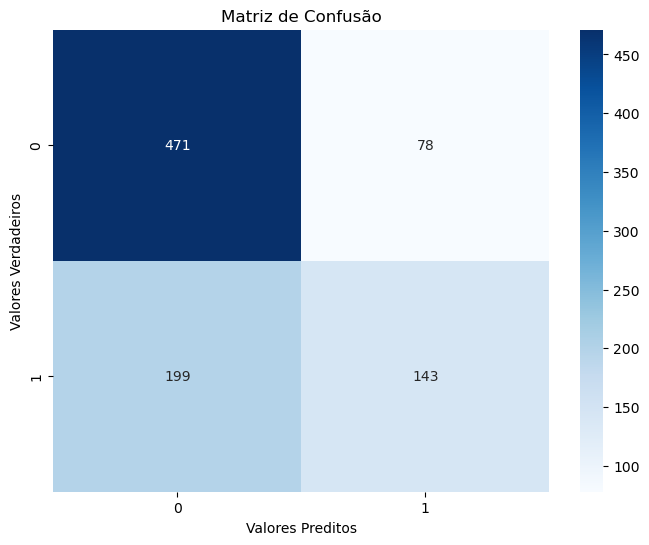

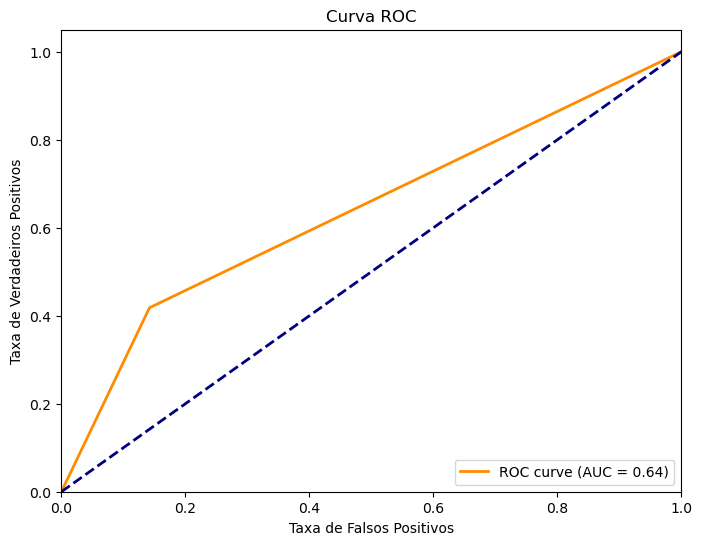

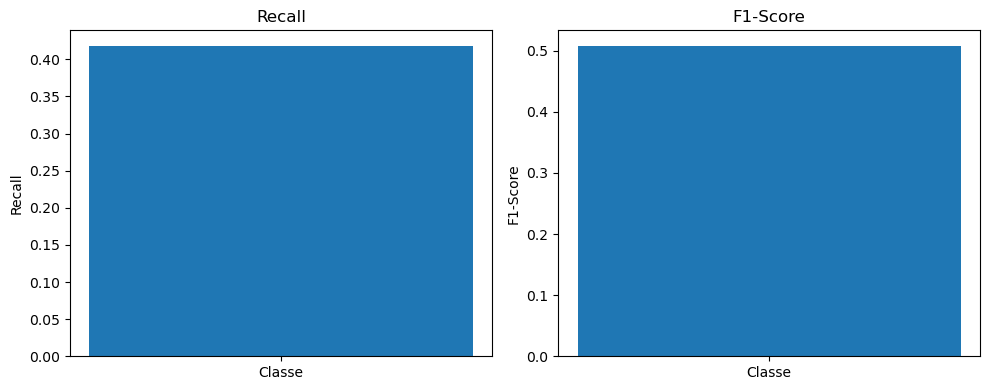

In [62]:
plot_metricas(resultado)

### Decision Tree Classifier

In [63]:
resultado = func_acuracia(DecisionTreeClassifier(), X, y, 10)

print(f"Acurácia: {resultado['Acuracia']*100}")
print(f"Matriz de Confusão: {resultado['Matriz de Confusao']*100}")
print(f"Curva ROC: {resultado['Curva ROC'][0]*100, resultado['Curva ROC'][1]*100, resultado['Curva ROC'][2]*100*100}")
print(f"Recall: {resultado['Recall']*100}")
print(f"Score: {resultado['F1-Score']*100}")

Acurácia: 97.64309764309765
Matriz de Confusão: [[46100  8800]
 [ 9700 24500]]
Curva ROC: (array([  0.       ,  16.0291439, 100.       ]), array([  0.       ,  71.6374269, 100.       ]), 7780.414150129421)
Recall: 71.6374269005848
Score: 72.59259259259258


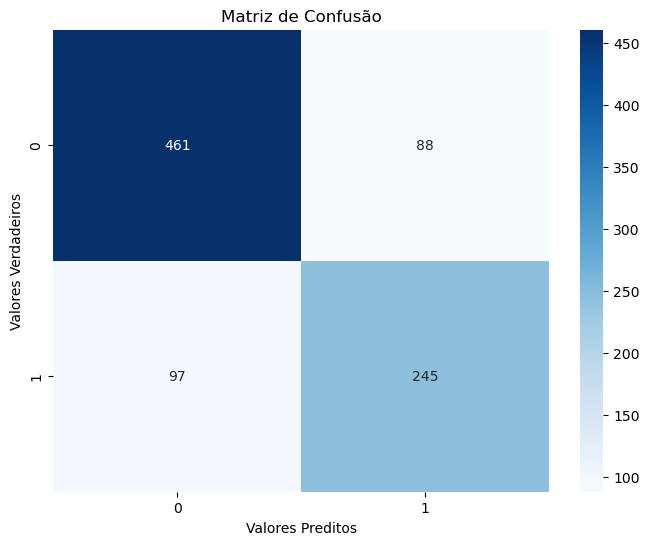

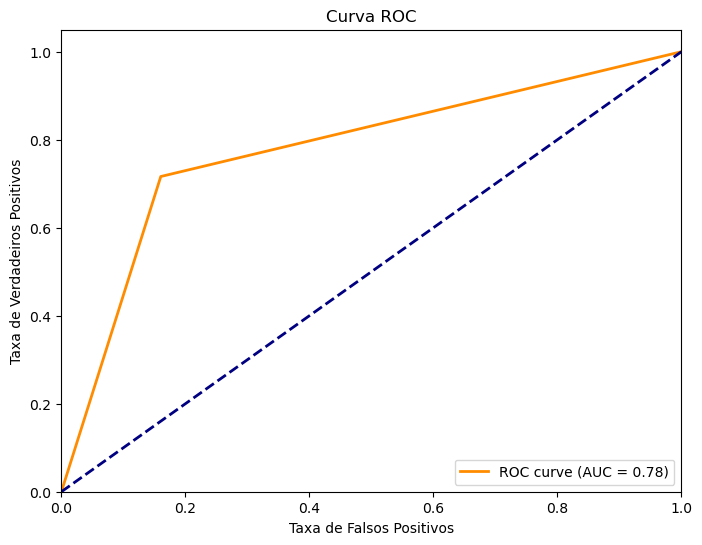

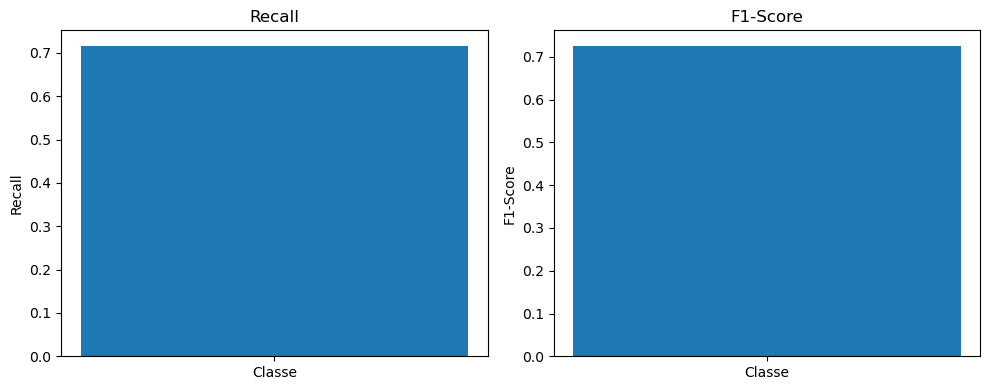

In [64]:
plot_metricas(resultado)

### Gradient Boost Trees

In [65]:
resultado = func_acuracia(GradientBoostingClassifier(), X, y, 10)

print(f"Acurácia: {resultado['Acuracia']*100}")
print(f"Matriz de Confusão: {resultado['Matriz de Confusao']*100}")
print(f"Curva ROC: {resultado['Curva ROC'][0]*100, resultado['Curva ROC'][1]*100, resultado['Curva ROC'][2]*100}")
print(f"Recall: {resultado['Recall']*100}")
print(f"Score: {resultado['F1-Score']*100}")

Acurácia: 89.337822671156
Matriz de Confusão: [[49600  5300]
 [10500 23700]]
Curva ROC: (array([  0.        ,   9.65391621, 100.        ]), array([  0.        ,  69.29824561, 100.        ]), 79.82216470137094)
Recall: 69.2982456140351
Score: 75.00000000000001


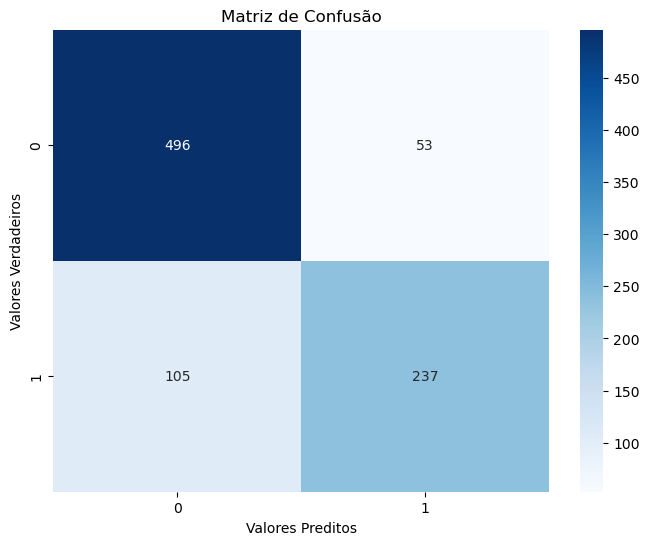

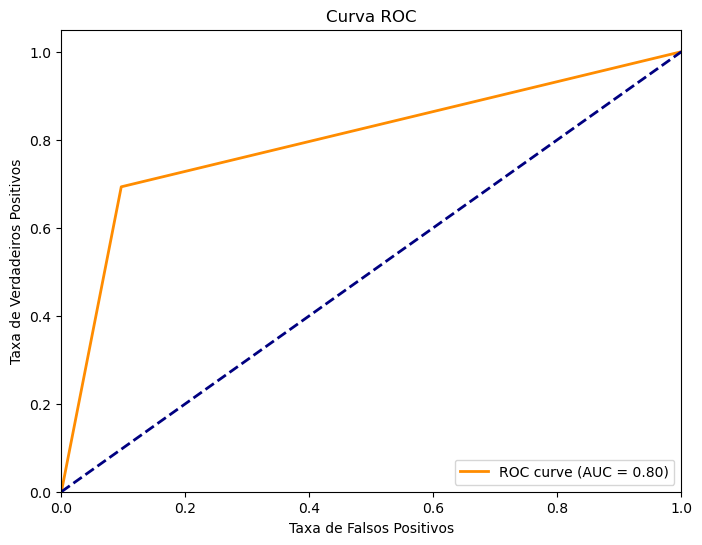

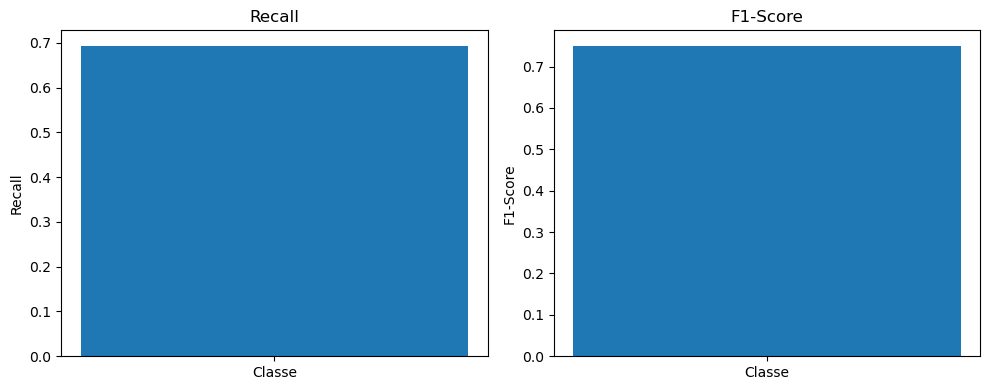

In [66]:
plot_metricas(resultado)

---

# Plotando gráfico de acuracia para comparação

In [67]:
modelos = ["Random Forest", "Logistic regression", "K-Nearest Neighbours",
           "Gaussian Naive Bayes", "Linear Support Vector Machines",
           "Stochastic Gradient Descent", "Decision Tree Classifier", "Gradient Boost Trees"]

acuracias = [97.64, 80.70, 82.26,79.69,80.36,62.74,97.64,89.34]

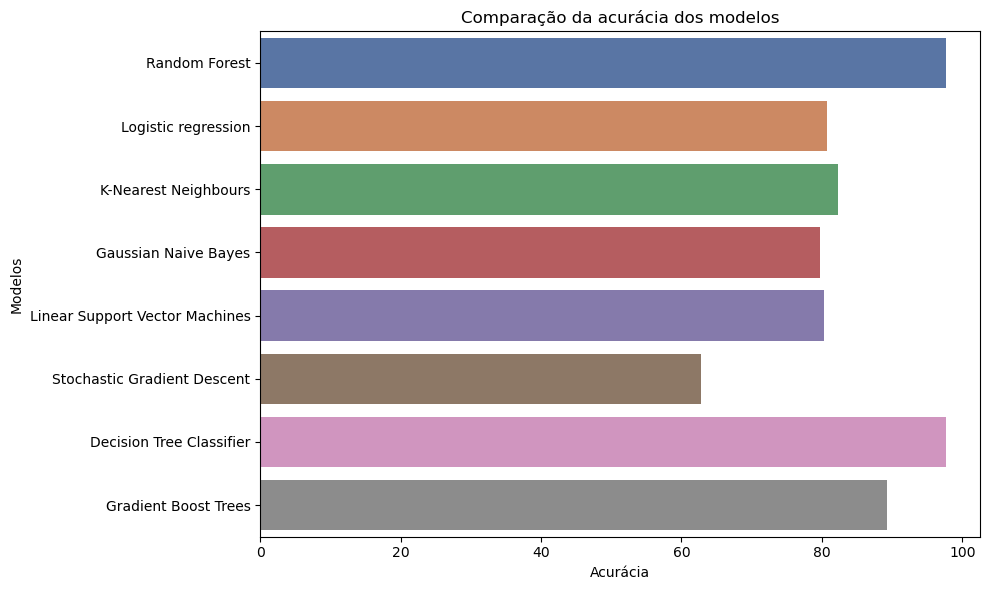

In [68]:
# Crie um gráfico de colunas
plt.figure(figsize=(10, 6))
sns.barplot(x=acuracias, y=modelos, palette='deep')  # Use uma paleta de cores de sua escolha

# rotulos do grafico
plt.xlabel('Acurácia')
plt.ylabel('Modelos')
plt.title('Comparação da acurácia dos modelos')

# Mostrar o gráfico
plt.tight_layout()
plt.show()